### Подключим данные и необходимые библиотеки

In [ ]:
!pip install phik
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import phik
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import warnings
warnings.filterwarnings('ignore')


In [74]:
# Загрузка данных
url = 'https://raw.githubusercontent.com/sergigusev/Datasets/main/gym_churn.csv'
df = pd.read_csv(url)
df

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,13,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,2,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,2,3,1.113884,1.120078,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,12,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,2,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5,3,1.630108,1.596237,0


In [75]:
# Посмотрим на балланс классов таргета
df['Churn'].value_counts()

Churn
0    2939
1    1061
Name: count, dtype: int64

Дисбаланс классов таргета составляет примерно 75% на 25% в пользу клиентов, которые продолжат сотрудничество

## EDA ##

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   int64  
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

Все признаки представлены в числовом формате

In [4]:
df.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,5.011500,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,3.899573,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,2.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,2.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,2.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,7.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,13.000000,31.000000,6.023668,6.146783,1.000000


Выбросы не обнаружены

In [5]:
df.isnull().sum()

gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

Пропуски в датасете не обнаружены

In [6]:
# Посмотрим на корреляционную матрицу с универсальным коэффициентом корреляции phik
df.drop(columns = 'Churn').phik_matrix(interval_cols=df.columns).style.background_gradient(cmap = 'coolwarm')

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
gender,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011302,0.000000,0.000000,0.000000,0.006725,0.000000,0.000000
Near_Location,0.000000,1.000000,0.000000,0.323394,0.000000,0.089690,0.238378,0.074166,0.116087,0.186007,0.057505,0.056060,0.074947
Partner,0.000000,0.000000,1.000000,0.650879,0.000000,0.187941,0.024482,0.055666,0.029261,0.389791,0.102712,0.000000,0.023412
Promo_friends,0.000000,0.323394,0.650879,1.000000,0.000000,0.149387,0.185199,0.055876,0.068440,0.327675,0.104268,0.036573,0.062685
Phone,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.035631,0.000000,0.000000
Contract_period,0.000000,0.089690,0.187941,0.149387,0.000000,1.000000,0.101860,0.160177,0.135359,0.957403,0.197495,0.145679,0.183997
Group_visits,0.011302,0.238378,0.024482,0.185199,0.000000,0.101860,1.000000,0.094863,0.050954,0.216721,0.101198,0.072465,0.090611
Age,0.000000,0.074166,0.055666,0.055876,0.000000,0.160177,0.094863,1.000000,0.081849,0.133948,0.163072,0.149835,0.213962
Avg_additional_charges_total,0.000000,0.116087,0.029261,0.068440,0.000000,0.135359,0.050954,0.081849,1.000000,0.109715,0.014526,0.091503,0.060987
Month_to_end_contract,0.000000,0.186007,0.389791,0.327675,0.000000,0.957403,0.216721,0.133948,0.109715,1.000000,0.196922,0.172098,0.191676


После анализа матрицы корреляций было принято решение убрать из датасета "ненужные" для построения модели признаки: **gender** и **Phone**. Данные два признака практически не имеют корреляции с другими признаками, поэтому они были удалены из датасета.

Мультиколлинеарность просматривается между **Month_to_end_contract** и **Contract_period**, а также **Avg_class_frequency_total** и **Avg_class_frequency_current_month**.

In [48]:
# Удалим "ненужные" признаки
df = df.drop(columns = ['gender', 'Phone'])

## Classification ##

### LogisticRegression model (Test recall score: 0.79) ###

In [59]:
# Разделим данные на признаки и целевую переменную
X = df.drop(columns = 'Churn')
y = df['Churn']

In [60]:
# Разделим данные на train и test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [61]:
# Проведём стандартизацию
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Преобразуем обратно в DataFrame с сохранением имен столбцов
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

In [62]:
# Обучим логистическую регрессию и оценим её качество
logreg_model = LogisticRegression(random_state = 42)
logreg_model.fit(X_train, y_train)

pred_train_logreg_model = logreg_model.predict(X_train)
pred_test_logreg_model = logreg_model.predict(X_test)

print(f'Train recall score: {metrics.recall_score(y_train, pred_train_logreg_model):.2f}')
print(f'Test recall score: {metrics.recall_score(y_test, pred_test_logreg_model):.2f}')

Train recall score: 0.85
Test recall score: 0.79


In [63]:
# Полный отчт о классификации
print('Classification report\n', metrics.classification_report(y_test, pred_test_logreg_model))

Classification report
               precision    recall  f1-score   support

           0       0.93      0.96      0.95       598
           1       0.88      0.79      0.83       202

    accuracy                           0.92       800
   macro avg       0.90      0.88      0.89       800
weighted avg       0.92      0.92      0.92       800



In [64]:
# Построим матрицу ошибок
conf_matrix = metrics.confusion_matrix(y_test, pred_test_logreg_model)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[576  22]
 [ 43 159]]


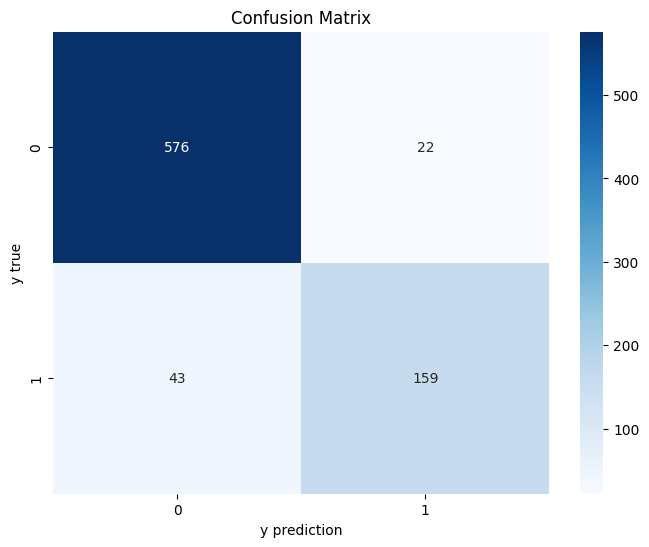

In [65]:
# Визуализация confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('y prediction')
plt.ylabel('y true')
plt.title('Confusion Matrix')
plt.show()

Ошибка II рода вышла **43** раза, то есть модель при **recall = 0.79 43 раза** сделала ложноотрицательное предсказание(клиент ушёл, а модель предположила, что он останется)

### Threshold offset (0.38), Test recall score: 0.84  ###

In [15]:
# Считаем вероятности, что человек перестанет ходить в зал
y_proba_pred = logreg_model.predict_proba(X_test)[:, 1]

# Для удобства завернём numpy-массив в Pandas Series
y_proba_pred = pd.Series(y_proba_pred)
# Создадим списки, в которых будем хранить значения метрик
recall_scores = []
precision_scores = []
f1_scores = []

# Сгенерируем набор вероятностных порогов в диапазоне от 0.1 до 1
thresholds = np.arange(0.1, 1, 0.05)

# В цикле будем перебирать сгенерированные пороги
for threshold in thresholds:
    # Людей, для которых вероятность перестать ходить в зал > threshold, относим к классу 1
    # В противном случае — к классу 0 - продолжают ходить
    y_pred = y_proba_pred.apply(lambda x: 1 if x>threshold else 0)
    #Считаем метрики и добавляем их в списки
    recall_scores.append(metrics.recall_score(y_test, y_pred))
    precision_scores.append(metrics.precision_score(y_test, y_pred))
    f1_scores.append(metrics.f1_score(y_test, y_pred))

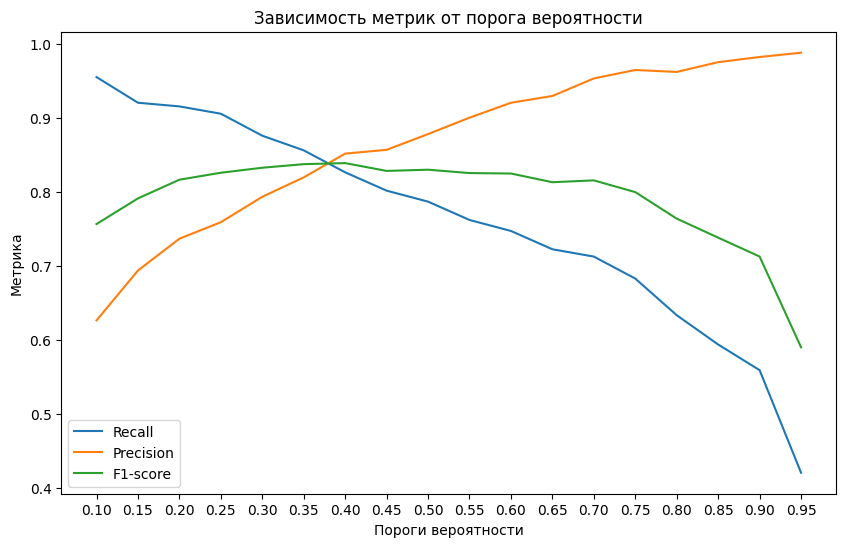

In [16]:
# Строим линейный график зависимости recall от threshold
plt.figure(figsize=(10, 6))
plt.plot(thresholds, recall_scores, label='Recall')
# Строим линейный график зависимости precision от threshold
plt.plot(thresholds, precision_scores, label='Precision')
# Строим линейный график зависимости F1 от threshold
plt.plot(thresholds, f1_scores, label='F1-score')

plt.title('Зависимость метрик от порога вероятности')
plt.xlabel('Пороги вероятности')
plt.ylabel('Метрика')
plt.xticks(thresholds)
plt.legend()

In [17]:
# Задаём оптимальный порог вероятностей
threshold_opt = 0.38
# Людей, для которых вероятность перестать ходить в зал > 0.38, относим к классу 1
# В противном случае — к классу 0 - продолжают ходить
y_pred_opt = y_proba_pred.apply(lambda x: 1 if x > threshold_opt else 0)
# Считаем метрики
print(metrics.classification_report(y_test, y_pred_opt))
print(f'Test recall score: {metrics.recall_score(y_test, y_pred_opt):.2f}')

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       598
           1       0.84      0.84      0.84       202

    accuracy                           0.92       800
   macro avg       0.89      0.89      0.89       800
weighted avg       0.92      0.92      0.92       800

Test recall score: 0.84


In [18]:
# Построим матрицу ошибок
conf_matrix_opt = metrics.confusion_matrix(y_test, y_pred_opt)
print("Confusion Matrix:\n", conf_matrix_opt)

Confusion Matrix:
 [[566  32]
 [ 32 170]]


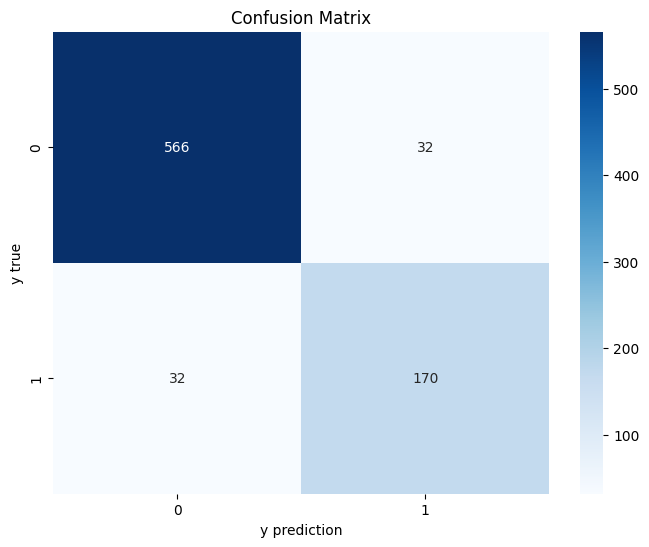

In [19]:
# Визуализация confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_opt, annot=True, fmt='d', cmap='Blues')
plt.xlabel('y prediction')
plt.ylabel('y true')
plt.title('Confusion Matrix')
plt.show()

Ошибка II рода вышла 32 раза, то есть модель при recall = 0.84 32 раза сделала ложноотрицательное предсказание(клиент ушёл, а модель предположила, что он останется)

### PolynomialFeatures model (degree=2), Threshold offset (0.4) , Test recall score: 0.90  ###

In [20]:
# Пробуем добавить полиномиальные признаки
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [21]:
# При С = 1 F1 score: 0.81
C = 100

In [22]:
# Обучим логистическую регрессию и оценим её качество
logreg_model_poly = LogisticRegression(C=C,random_state=42)
logreg_model_poly.fit(X_train_poly, y_train)

pred_train_logreg_model_poly = logreg_model_poly.predict(X_train_poly)
pred_test_logreg_model_poly = logreg_model_poly.predict(X_test_poly)

print(f'Train recall score: {metrics.recall_score(y_train, pred_train_logreg_model_poly):.2f}')
print(f'Test recall score: {metrics.recall_score(y_test, pred_test_logreg_model_poly):.2f}')

Train recall score: 0.92
Test recall score: 0.88


In [24]:
# Считаем вероятности, что человек перестанет ходить в зал
y_proba_pred_poly = logreg_model_poly.predict_proba(X_test_poly)[:, 1]

# Для удобства завернём numpy-массив в Pandas Series
y_proba_pred_poly = pd.Series(y_proba_pred_poly)
# Создадим списки, в которых будем хранить значения метрик
recall_scores_poly = []
precision_scores_poly = []
f1_scores_poly = []

# Сгенерируем набор вероятностных порогов в диапазоне от 0.1 до 1
thresholds_poly = np.arange(0.1, 1, 0.05)

# В цикле будем перебирать сгенерированные пороги
for threshold_poly in thresholds_poly:
    # Людей, для которых вероятность перестать ходить в зал > threshold, относим к классу 1
    # В противном случае — к классу 0 - продолжают ходить
    y_pred_poly = y_proba_pred_poly.apply(lambda x: 1 if x>threshold_poly else 0)
    # Считаем метрики и добавляем их в списки
    recall_scores_poly.append(metrics.recall_score(y_test, y_pred_poly))
    precision_scores_poly.append(metrics.precision_score(y_test, y_pred_poly))
    f1_scores_poly.append(metrics.f1_score(y_test, y_pred_poly))

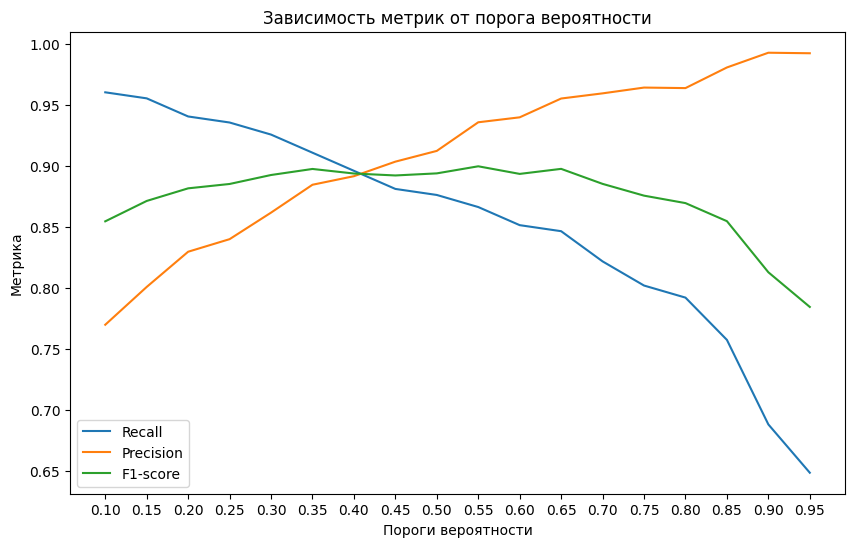

In [25]:
# Строим линейный график зависимости recall от threshold
plt.figure(figsize=(10, 6))
plt.plot(thresholds_poly, recall_scores_poly, label='Recall')
# Строим линейный график зависимости precision от threshold
plt.plot(thresholds_poly, precision_scores_poly, label='Precision')
# Строим линейный график зависимости F1 от threshold
plt.plot(thresholds_poly, f1_scores_poly, label='F1-score')

plt.title('Зависимость метрик от порога вероятности')
plt.xlabel('Пороги вероятности')
plt.ylabel('Метрика')
plt.xticks(thresholds_poly)
plt.legend()

In [26]:
#Задаём оптимальный порог вероятностей
threshold_opt_poly = 0.4
#Людей, для которых вероятность перестать ходить в зал > 0.4, относим к классу 1
#В противном случае — к классу 0 - продолжают ходить
y_pred_opt_poly = y_proba_pred_poly.apply(lambda x: 1 if x > threshold_opt_poly else 0)
#Считаем метрики
print(metrics.classification_report(y_test, y_pred_opt_poly))
print(f'Test recall score: {metrics.recall_score(y_test, y_pred_opt_poly):.2f}')

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       598
           1       0.89      0.90      0.89       202

    accuracy                           0.95       800
   macro avg       0.93      0.93      0.93       800
weighted avg       0.95      0.95      0.95       800

Test recall score: 0.90


In [27]:
# Построим матрицу ошибок
conf_matrix_opt_poly = metrics.confusion_matrix(y_test, y_pred_opt_poly)
print("Confusion Matrix:\n", conf_matrix_opt_poly)

Confusion Matrix:
 [[576  22]
 [ 21 181]]


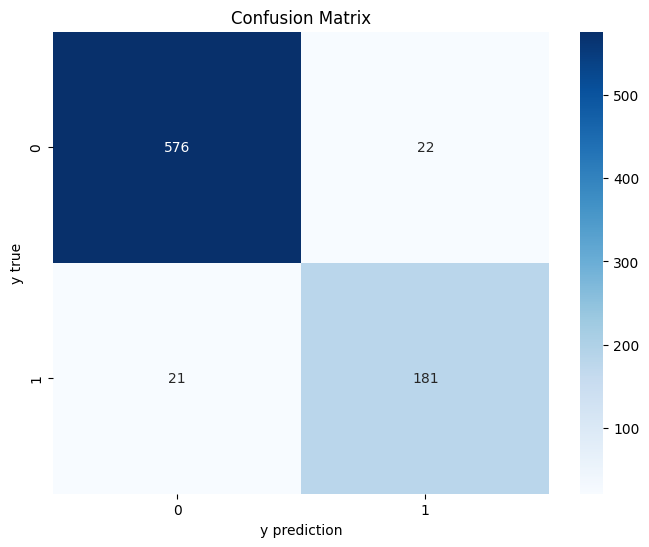

In [28]:
# Визуализация confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_opt_poly, annot=True, fmt='d', cmap='Blues')
plt.xlabel('y prediction')
plt.ylabel('y true')
plt.title('Confusion Matrix')
plt.show()

Ошибка II рода вышла 21 раз, то есть модель при recall = 0.90 21 раз сделала ложноотрицательное предсказание(клиент ушёл, а модель предположила, что он останется)

Итого: данная модель (полином второй степени логистической регрессии) является оптимальной для предсказывания оттока клиентов. После проведённых исследований наиболее высокий показатель метрики recall score выявляется у этой модели и составляет 0.90

## Clustering ##

### Определим количество кластеров

In [29]:
# Проведём стандартизацию данных
scaler = StandardScaler()
scaled_df = pd.DataFrame(
    scaler.fit_transform(df),
    columns=df.columns, index=df.index
).drop('Churn', axis=1)
scaled_df

,Near_Location,Partner,Promo_friends,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
0,0.427881,1.026861,1.497161,0.289890,1.194032,-0.056554,-1.377531,-0.002949,-0.193329,-1.911920,-1.678472
1,0.427881,-0.973842,-0.667931,1.608822,1.194032,0.557327,-0.350213,2.048814,0.873680,0.045176,0.136014
2,0.427881,1.026861,-0.667931,-0.809219,-0.837498,-0.363494,-0.181592,-0.772361,-0.460081,-0.020493,-0.029019
3,0.427881,1.026861,1.497161,1.608822,1.194032,1.171208,-0.874722,1.792343,-0.460081,1.364655,1.510450
4,0.427881,1.026861,1.497161,-0.809219,-0.837498,-0.977375,0.533700,-0.772361,-0.193329,-0.787076,-0.614542
...,...,...,...,...,...,...,...,...,...,...,...
3995,0.427881,1.026861,-0.667931,1.608822,-0.837498,1.171208,-1.500232,1.792343,1.140432,0.417105,0.552842
3996,0.427881,-0.973842,-0.667931,-0.809219,1.194032,-0.056554,-0.810225,-0.772361,-0.726833,-0.619110,-1.400294
3997,0.427881,1.026861,1.497161,1.608822,-0.837498,-0.363494,-0.713002,1.535873,-0.460081,0.933139,1.011031
3998,0.427881,1.026861,1.497161,0.289890,-0.837498,0.864268,-0.882582,-0.002949,-0.193329,-0.256049,-0.162252


####Метод локтя

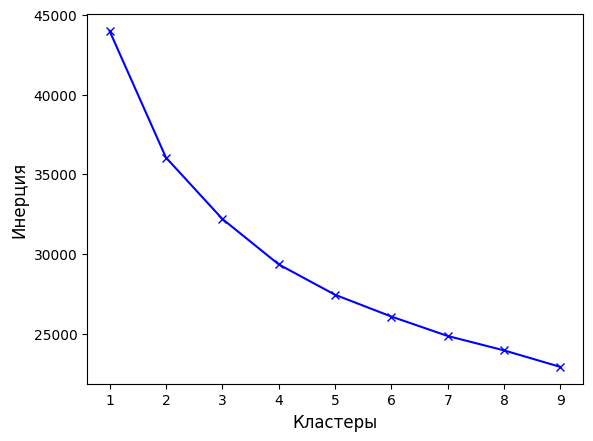

In [30]:
# Рассчитаем количество кластеров
X = scaled_df

# функция, которая принимает количество кластеров для k-means и матрицу с признаками объектов и возвращает инерцию
def get_inertia(cluster_num, X):
    k_means = KMeans(n_clusters=cluster_num, random_state=42)
    k_means.fit(X)
    inertia = k_means.inertia_
    return inertia

inertia = []
for cluster_num in range(1, 10):
    inertia.append(get_inertia(cluster_num, X))

# визуализируем, как менялась инерция в зависимости от количества кластеров
plt.xlabel("Кластеры", fontsize=12)
plt.ylabel("Инерция", fontsize=12)
plt.plot([i for i in range(1, 10)], inertia, 'xb-')
plt.show()

####Коэффициент силуэта

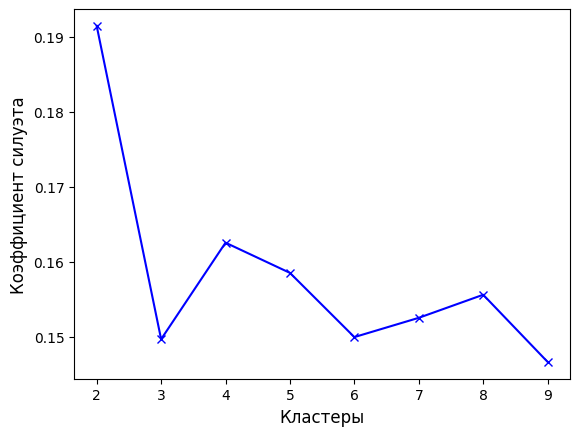

In [32]:
# Создадим функцию, как и при подсчете метода локтя
def get_silhouette(cluster_num, X):
    k_means = KMeans(n_clusters=cluster_num, random_state=42)
    k_means.fit(X)
    # подсчитаем метрику силуэта, передав данные и то, к каким кластерам относятся объекты
    silhouette = metrics.silhouette_score(X, k_means.predict(X))
    return silhouette

# создадим пустой словарь, ключами будут инерция и количество кластеров
silhouette_scores = []

for cluster_num in range(2, 10):
    silhouette_scores.append(get_silhouette(cluster_num, X))

# визуализируем, как менялась инерция в зависимости от количества кластеров
plt.xlabel("Кластеры", fontsize=12)
plt.ylabel("Коэффициент силуэта", fontsize=12)
plt.plot([i for i in range(2, 10)], silhouette_scores, 'xb-')
plt.show()

####Дендорграмма

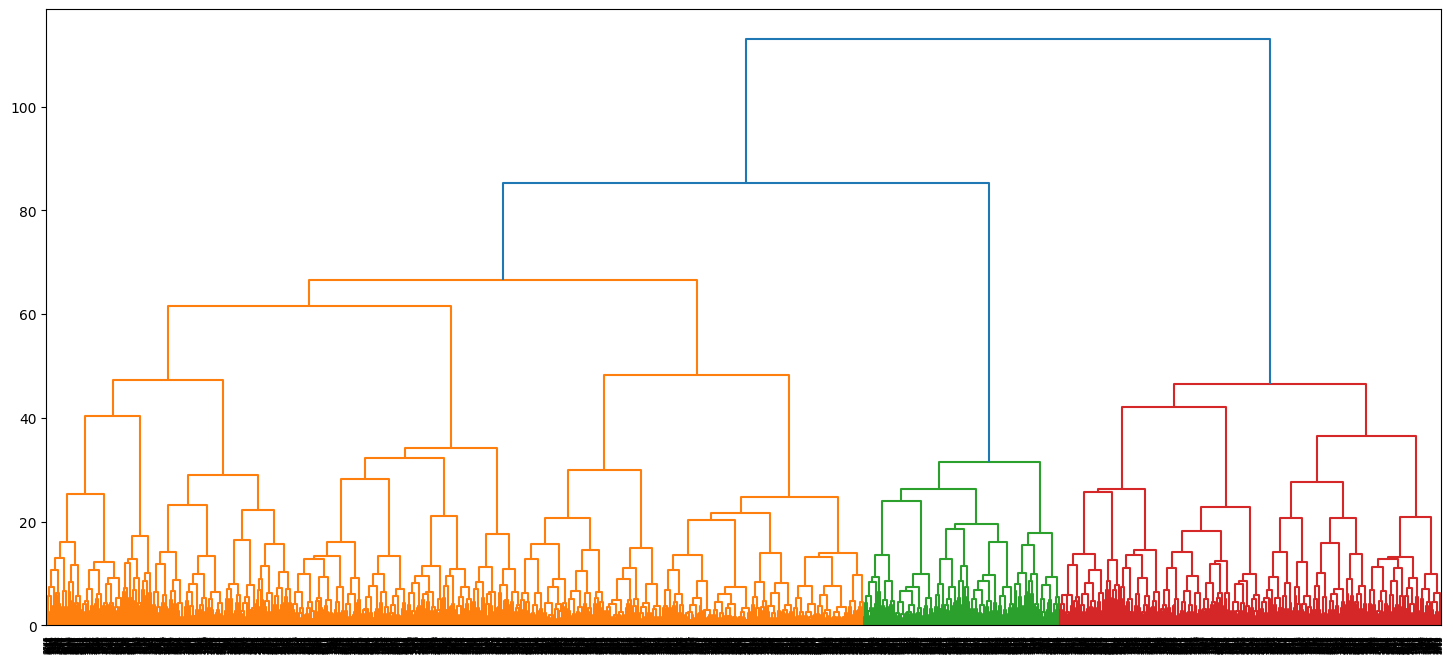

In [33]:
# Визуализируем дендорграмму
# рассчитаем расстояния между кластерами
linked = linkage(X, 'ward')

plt.figure(figsize=(18, 8))
dendrogram(Z=linked,
            orientation='top',
            labels=df.index,
            distance_sort='descending')

plt.show()

**Итого: определим 3 кластера**

###Иерархическая кластеризация

In [36]:
# Инициализируем алгоритм иерархической кластеризации с тремя кластерами
clustering = AgglomerativeClustering(3)

# опрределим, к какому кластеру принадлежат клиенты
predictions_agg = clustering.fit_predict(X)
# если мы хотим получить метки класса для тех же данных, на которых обучили модель, можно запросить labels
predictions_agg = clustering.labels_

# сохраним предсказания в датафрейм
df['Clusters_agg'] = predictions_agg

In [35]:
grouped_agg = df.groupby('Clusters_agg').mean()
grouped_agg

,Near_Location,Partner,Promo_friends,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
Clusters_agg,,,,,,,,,,,,
0,0.994459,0.395141,0.296675,2.347400,0.404945,28.982950,141.358590,3.000853,3.723785,1.841073,1.699293,0.333760
1,0.957952,0.681901,0.446984,10.865631,0.529250,29.903108,165.532905,10.301645,4.260512,1.998634,1.987779,0.031079
2,0.000000,0.489286,0.087500,2.376786,0.214286,28.623214,134.026179,3.100000,2.682143,1.804312,1.619709,0.435714


###Кластеризация методом k-Means

In [37]:
# Инициализируем алгоритм k-means с количеством кластеров 3
kmeans = KMeans(n_clusters=3, random_state=42)

# обучим и предскажем, к какому кластеру принадлежат страны
predictions_kmeans = kmeans.fit_predict(X)

# если мы хотим получить метки класса для тех же данных, на которых обучили модель, можно запросить labels
predictions = kmeans.labels_

# сохраним предсказания в датафрейм
df['Clusters_kmeans'] = predictions_kmeans

In [ ]:
grouped_kmeans = df.groupby('Clusters_kmeans').mean().drop('Clusters_agg', axis=1)
grouped_kmeans

,Near_Location,Partner,Promo_friends,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
Clusters_kmeans,,,,,,,,,,,,
0,0.760922,0.386529,0.189927,1.927791,0.296117,28.064320,128.718812,2.714806,2.239684,1.214103,0.954827,0.560680
1,0.940823,0.772727,0.566038,10.801029,0.545455,29.935678,161.844005,10.178388,4.720412,1.968522,1.961312,0.027444
2,0.868465,0.344857,0.220067,2.490725,0.442664,30.001686,157.619056,3.123103,4.809444,2.714959,2.704690,0.088533


##Интерпретация результатов

Более наглядно разбил датасет на кластеры метод K-Means. **Кластер 1** имеет минимальный отток, **кластер 2** имеет средний отток, а **кластер 0** имеет максимальный отток.

Наименьший отток клиентов выявлен среди тех, кто живёт около фитнес-центра, является сотрудником или партнёром, посещяет групповые тренировки, ходит продолжительный период, абонемент не заканчивается, часто ходит в зал, часто приобретает другие услуги фитнес-центра: кофе, спорт товары и тд.

###Типичные портреты пользователей по кластерам

**Кластер 0**: Пользователи этого кластера проживают или работают наиболее отдалённо от фитнес центра, в меньшей степени являются сотрудниками компании и меньше всего участовуют в акции "приведи друга". Клиенты практически не ходят на групповые тренировки и имеют активный текущий абонемент не более двух месяцев. Пользователи являются самой молодой возрастной группой, около 28 лет. Меньше всех пользуются платными услугами. Ходят в фитнес центр примерно один раз в неделю. Абонементы пользователей в среднем закончатся меньше, чем через два с половиной месяца и средняя продолжительность посещений фитнес центра составляет чуть больше двух месяцев. **Максимальная вероятность оттока**

**Кластер 1**: Пользователи данного кластера проживают или работают ближе остальных к фитнес центру. Чаще всех являются сотрудниками компании, чаще всех зовут своих друзей центр. Наиболее продолжительно пользуются абонементами, в среднем более десяти месяцев. Чаще всех посещают групповые занятия. Находятся в средней возрастной группе, около тридцати лет. Клиенты этого кластера больше всего приносят дохода фитнес центру. Посещаемость около двух раз в неделю, а общее среднее время сотрудничества составляет больше четырёх месяцев. **Минимальная вероятность оттока**

**Кластер 2**: Пользователи этого кластера по описательным характеристикам находятся между пользователями 0 и пользователями 1 клатеров. Ярко выраженные особенности: практически не являются сотрудниками компании и не пользуются акцией "приведи друга". Возрастная группа в среднем 30+ лет. Ходят на групповые тренировки. Пользуются абонементами в среднем чуть более двух месяцев. В среднем приносят доход практически на равне с пользователями кластера 1. В среднем посещяют фитнес центр практически по три раза в неделю. Общее среднее время сотрудничества составляет почти пять месяцев. **Незначительная вероятность оттока**

###Признаки, влияющие на отток

In [71]:
feature_importances = pd.DataFrame(abs(logreg_model.coef_[0]),
                                   index=X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)

                                   importance
Avg_class_frequency_current_month    4.497023
Lifetime                             3.584373
Avg_class_frequency_total            3.370096
Contract_period                      1.166511
Age                                  1.133519
Avg_additional_charges_total         0.540458
Group_visits                         0.351256
Promo_friends                        0.240940
Month_to_end_contract                0.131087
Near_Location                        0.099255
Partner                              0.033683


Судя по абсолютным значениям коеффициентов можно сделать вывод, что на вероятность оттока клиентов **больше всего** влияют такие признаки, как **средняя частота посещений зала за предыдущий месяц, за всё время, а также время с момента первого посещения зала.**

**Меньше всего** на вероятность оттока клиентов влияют такие признаки, как **партнёрство с компанией, близость фитнес центра к пользователю, срок до окончания действия абонемента**